In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
from pandas.plotting import autocorrelation_plot

<ipython-input-1-602bd324bd40>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UdeM AI/Weekly Challenges/Week 1/shampoo.csv")

FileNotFoundError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


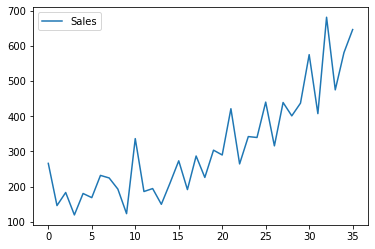

In [ ]:
df.plot()

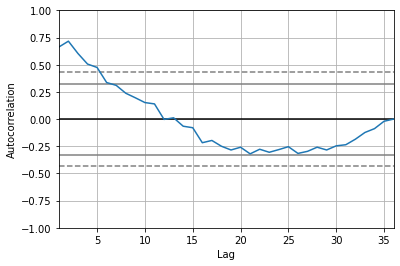

In [ ]:
corr = pd.plotting.autocorrelation_plot(df["Sales"])

In [ ]:
df["Time"] = np.arange(len(df.index))

In [ ]:
df.head()

,Month,Sales,Time
0,1-01,266.0,0
1,1-02,145.9,1
2,1-03,183.1,2
3,1-04,119.3,3
4,1-05,180.3,4


In [ ]:
data = df.to_numpy()

In [ ]:
x_train = data[:30, -1]
y_train = data[:30, 1]
x_test = data[30:, -1]
y_test = data[30:, 1]

#Regression

In [ ]:
x_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object)

In [ ]:
np.mean(x_train)

14.5

In [ ]:
x_train - np.mean(x_train)

array([-14.5, -13.5, -12.5, -11.5, -10.5, -9.5, -8.5, -7.5, -6.5, -5.5,
       -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5,
       7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5], dtype=object)

In [ ]:
(np.sum(x_train - np.mean(x_train)))**2

0.0

In [ ]:
n = np.size(x_train)

In [ ]:
SS_xx = np.sum(x_train*x_train) - n*np.mean(x_train)*np.mean(x_train)

In [ ]:
SS_xx

2247.5

In [ ]:
def estimators(x,y):
  beta_1_hat = np.sum((x - np.mean(x))*(y - np.mean(y))) / (np.sum((x - np.mean(x))**2))
  beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)

  return beta_1_hat, beta_0_hat

In [ ]:
beta_1, beta_0 = estimators(x_train, y_train)

In [ ]:
def predict(x_test, beta_1, beta_0):
  return beta_0 + beta_1 * x_test

In [ ]:
slope = predict(x_train, beta_1, beta_0)
preds = predict(x_test, beta_1, beta_0)

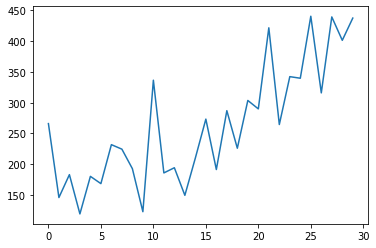

In [ ]:
plt.plot(y_train)

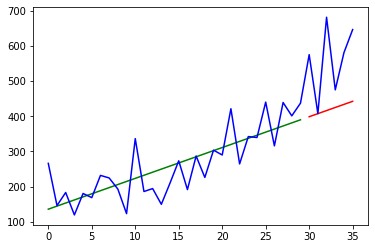

In [ ]:
# plt.plot(x_train, y_train, color='b', label='data')
plt.plot(x_train, slope, color='g', label='slope')
plt.plot(x_test, preds, color='r', label='preds')
plt.plot(data[:, -1], data[:, 1], color="b", label="data")

In [ ]:
def loss(y, preds):
  return np.mean((y - preds)**2)

In [ ]:
loss(y_test, preds)

27954.43072233544

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(x_train.reshape(-1, 1))
Y_train = sc_Y.fit_transform(y_train.reshape(-1, 1))

In [ ]:
X = sc_X.fit_transform(data[:, -1].reshape(-1, 1))
Y = sc_Y.fit_transform(data[:, 1].reshape(-1, 1))

In [ ]:
Y_train = Y_train.ravel()

In [ ]:
from sklearn.svm import SVR

In [ ]:
reg = SVR(kernel="rbf")

In [ ]:
reg.fit(X_train, Y_train)

SVR()

In [ ]:
x_test_svr = sc_X.transform(x_test.reshape(-1, 1))

In [ ]:
fit_svr = reg.predict(X_train)

In [ ]:
preds_svr = reg.predict(x_test_svr)

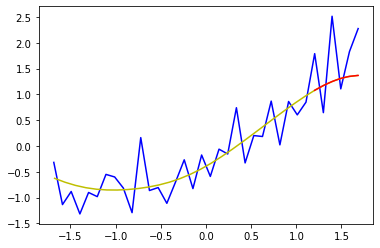

In [ ]:
plt.plot(X, Y, color='b', label='data')
plt.plot(X_train, fit_svr , color='y', label='data')
plt.plot(x_test_svr, preds_svr , color='r', label='data')

In [ ]:
x_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object)

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(16), activation="relu", solver="adam")

In [ ]:
nn.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=16)

In [ ]:
preds_nn = nn.predict(x_test_svr)

In [ ]:
fit_nn = nn.predict(X_train)

In [ ]:
fit_nn.shape

(30,)

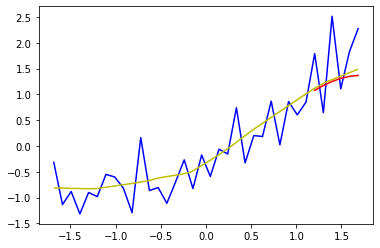

In [ ]:
plt.plot(X, Y, color='b', label='data')
plt.plot(X_train, fit_nn , color='y', label='data')
plt.plot(x_test_svr, preds_svr , color='r', label='preds')